In [17]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [18]:
import pandas as pd

# Load the provided training and test datasets
train_filepath = 'train.csv'
test_filepath = 'test.csv'

train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)


# Display the first few rows of the training and test datasets
train_data.head(), test_data.head()

(   id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
    id keyword location                                               text
 0   0     NaN      NaN                 Just happened a terrible car crash
 1   2     NaN      NaN  Heard about #earthquake is different cities, s...
 2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
 3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
 4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing and Model Training
# Since the focus is on the text of the tweets, we'll use only the 'text' column and 'target' for training

# Creating a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['target'], test_size=0.2, random_state=42)

# Training the model
pipeline.fit(X_train, y_train)

# Validating the model
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

accuracy, report

(0.7912015758371634,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.89      0.83       874\n           1       0.82      0.66      0.73       649\n\n    accuracy                           0.79      1523\n   macro avg       0.80      0.77      0.78      1523\nweighted avg       0.79      0.79      0.79      1523\n')

In [20]:
# Making predictions on the test dataset
test_predictions = pipeline.predict(test_data['text'])

# Creating a DataFrame to display predictions alongside tweet IDs
predictions_df = pd.DataFrame({
    'id': test_data['id'],
    'text': test_data['text'],
    'predicted_target': test_predictions
})

predictions_df.head()


,id,text,predicted_target
0,0,Just happened a terrible car crash,1
1,2,"Heard about #earthquake is different cities, s...",1
2,3,"there is a forest fire at spot pond, geese are...",1
3,9,Apocalypse lighting. #Spokane #wildfires,1
4,11,Typhoon Soudelor kills 28 in China and Taiwan,1


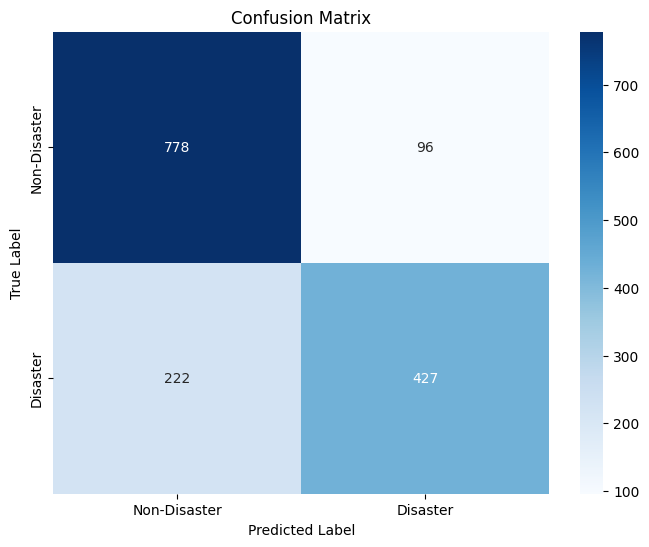

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating confusion matrix for the validation set
cm = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Disaster", "Disaster"], yticklabels=["Non-Disaster", "Disaster"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


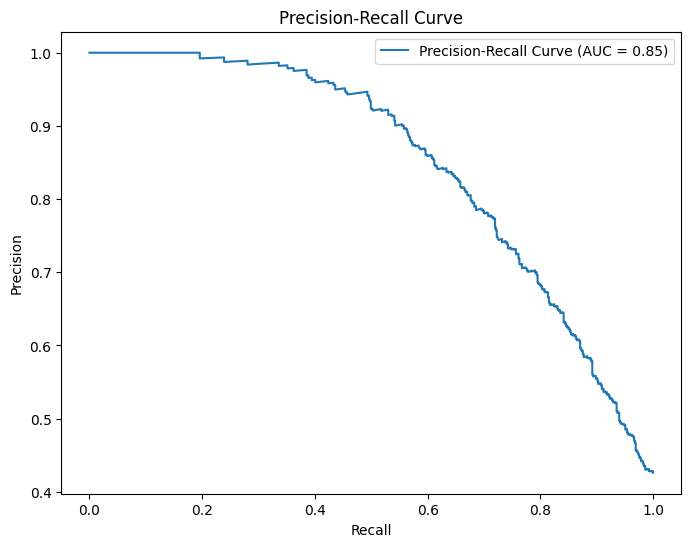

In [22]:
# Corrected approach to plot the precision-recall curve using predict_proba method
y_prob = pipeline.predict_proba(X_val)[:, 1]  # Probability of the positive class
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

# Calculating the area under the precision-recall curve
auc_precision_recall = auc(recall, precision)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_precision_recall:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


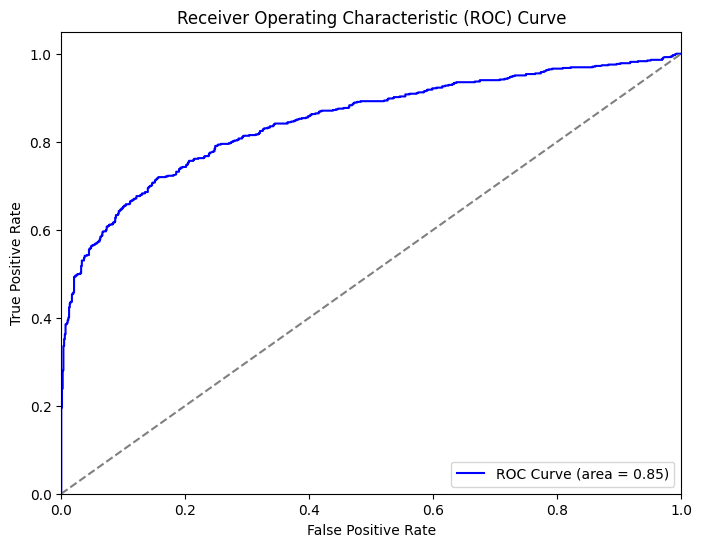

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


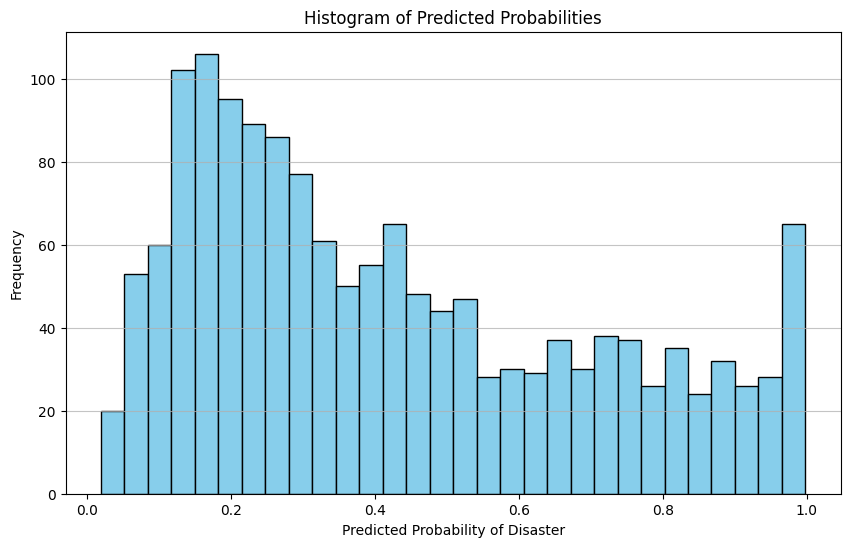

In [24]:
# Creating a histogram of the predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Disaster')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
